In [1]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://www.imdb.com/list/ls029719694/")
soup =BeautifulSoup(page.content, 'html.parser')
rating_lst=[]
content=""
links=[]
#get_movie_container = soup.find("h3", {"class": "lister-item-header"})
get_movie_container = soup.find_all("div", {"class": "lister-item-content"})
#print(get_movie_container)
num=soup.find_all("span", {"class": "lister-item-index unbold text-primary"})
for item in get_movie_container:
    s=item.get_text().strip()
    lst=s.split('\n')
    lst2=[i for i in lst if i!=""]
    rating_lst.append(lst2[8])
    link=item.a.get('href')
    links.append(link)
    #print(lst2)
#print(rating_lst)    

In [2]:
import numpy as np

In [3]:
profit=[]
lst_budget=[]
lst_net=[]
#print(links)    
for link in links:
    page2 = requests.get(f"https://www.imdb.com{link}?ref_=ttls_li_tt")
    soup2 =BeautifulSoup(page2.content, 'html.parser')
    rel_date=soup2.find('div',{'id':'titleDetails'})
    
    rel_text=rel_date.get_text().strip()
    #print(rel_text)
    lst3=rel_text.split('\n')
    #print(lst3)
    budget=str([i for i in lst3 if 'Budget' in i])
    lst_budget.append(budget)
    net_collection=str([i for i in lst3 if 'Cumulative Worldwide Gross' in i])
    lst_net.append(net_collection)
    

#print(len(lst_budget))    

In [4]:

profit=[]

both=zip(lst_budget,lst_net)
for i,j in both:
    if i!="[]":
    #print(i,j)
        n_i=int((i[10:-2]).replace(',',""))
        
        
        
    #print(s)
   # print(s[28:-2])
        s=j.replace(" ",'')
        n_j=int((s[28:-2]).replace(',',""))
    #print(n_j)
        res=((n_j-n_i)/n_i)*100
        profit.append(res)
    else:
        res=0
#print(profit)
    
    

In [5]:
lst_end=[]
overall=zip(rating_lst,profit)
for i,j in overall:
    res=float(i)*j
    lst_end.append(res)
#print(lst_end) 


In [6]:

m=max(lst_end)
lst_end.index(m)
m


6104.723457

Text(0, 0.5, 'Custom index')

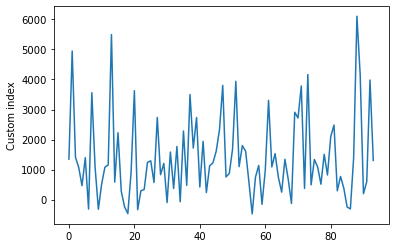

In [7]:
import matplotlib.pyplot as plt
plt.plot(lst_end[0:-5])
plt.ylabel("Custom index")

